# Session2 Exercises

In [2]:
import pandas as pd

## 1.0

Load the coaster_db.csv dataset

In [122]:
coaster = pd.read_csv('coaster_db.csv')

## 1.1
Store the coaster dataset in a new database

In [18]:
import sqlite3

# drop duplicate column names
coaster = coaster.loc[:,~coaster.columns.str.lower().duplicated()]

with sqlite3.connect('coaster.db') as connection:
    coaster.to_sql(
        name = 't',
        con = connection,
        index = False,
        if_exists = 'replace')

## 2

Clean the dataset

In [57]:
coaster.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [123]:
coaster = coaster[['coaster_name',
                  'Length',
                  #'Speed',
                  'Location',
                  'Status',
                  #'Opening date',
                  #'Type',
                  'Manufacturer',
                  #'Height restriction',
                  #'Model',
                  'Height',
       #'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
                  #'Duration', 'Capacity', 'G-force',
                  'Designer', #'Max vertical angle',
       #'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
                  'Track layout', #'Fastrack available', 'Soft opening date.1',
       #'Closing date', 'Opened', 'Replaced by', 'Website',
       #'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       #'Single rider line available', 'Restraint Style', 'Acceleration',
       #'Restraints', 'Name', 'year_introduced',
                  'latitude',
                  'longitude',
       #'Type_Main', 
                   'opening_date_clean', #'speed1', 'speed2', 'speed1_value',
                  
                  #'speed1_unit',
                   'speed_mph', 'height_value', 'height_unit',# 'height_ft',
       #'Inversions_clean', 'Gforce_clean'
                 ]]

In [59]:
coaster.head()

,coaster_name,Length,Location,Status,Manufacturer,Height,Designer,Track layout,latitude,longitude,opening_date_clean,speed_mph,height_value,height_unit
0,Switchback Railway,600 ft (180 m),Coney Island,Removed,LaMarcus Adna Thompson,50 ft (15 m),LaMarcus Adna Thompson,Gravity pulled coaster,40.5740,-73.9780,1884-06-16,6.0,50.0,ft
1,Flip Flap Railway,NaN,Sea Lion Park,Removed,Lina Beecher,NaN,Lina Beecher,NaN,40.5780,-73.9790,1895-01-01,NaN,NaN,NaN
2,Switchback Railway (Euclid Beach Park),NaN,"Cleveland, Ohio, United States",Closed,NaN,NaN,NaN,NaN,41.5800,-81.5700,NaN,NaN,NaN,NaN
3,Loop the Loop (Coney Island),NaN,Other,Removed,Edwin Prescott,NaN,Edward A. Green,NaN,40.5745,-73.9780,1901-01-01,NaN,NaN,NaN
4,Loop the Loop (Young's Pier),NaN,Other,Removed,Edwin Prescott,NaN,Edward A. Green,NaN,39.3538,-74.4342,1901-01-01,NaN,NaN,NaN


In [60]:
coaster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   coaster_name        1087 non-null   object 
 1   Length              953 non-null    object 
 2   Location            1087 non-null   object 
 3   Status              874 non-null    object 
 4   Manufacturer        1028 non-null   object 
 5   Height              965 non-null    object 
 6   Designer            578 non-null    object 
 7   Track layout        335 non-null    object 
 8   latitude            812 non-null    float64
 9   longitude           812 non-null    float64
 10  opening_date_clean  837 non-null    object 
 11  speed_mph           937 non-null    float64
 12  height_value        965 non-null    float64
 13  height_unit         965 non-null    object 
dtypes: float64(4), object(10)
memory usage: 119.0+ KB


In [124]:
#convert all heights to feet
coaster.loc[coaster['height_unit'] == 'm', 'height_value'] *= 3.28084
coaster.drop(columns='height_unit', inplace = True)

In [125]:
#convert opening date
coaster['date'] = pd.to_datetime(coaster['opening_date_clean'], format='%Y-%m-%d')
coaster.drop(columns='opening_date_clean', inplace = True)

In [131]:
# Cleaning the length
coaster['Len_ft'] = coaster['Length'].str.extract(r"(\d*,?\d+)\sft")
coaster['Len_ft'] = pd.to_numeric(coaster['Len_ft'], errors='coerce')
coaster.drop(columns='Length', inplace = True)

## 2.1

Add a column giving the average speed per height

In [63]:
coaster['avg_s_h'] = coaster['speed_mph'] / coaster['height_value']

## 2.2
Find the number of empty values

In [64]:
coaster.isna().sum().sum()

3044

## 2.3
Find the duplicated coasters and remove them

In [71]:
coaster.drop_duplicates(subset='coaster_name', inplace=True)

In [73]:
coaster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 1086
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   coaster_name  990 non-null    object        
 1   Length        867 non-null    object        
 2   Location      990 non-null    object        
 3   Status        844 non-null    object        
 4   Manufacturer  932 non-null    object        
 5   Height        880 non-null    object        
 6   Designer      513 non-null    object        
 7   Track layout  308 non-null    object        
 8   latitude      783 non-null    float64       
 9   longitude     783 non-null    float64       
 10  speed_mph     850 non-null    float64       
 11  height_value  880 non-null    float64       
 12  avg_s_h       823 non-null    float64       
 13  date          807 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(8)
memory usage: 116.0+ KB


## 3
Ask questions

## 3.1
What is the average coaster length per decade?

In [134]:
coaster.resample('10Y', on='date')['Len_ft'].mean().round(2)

date
1884-12-31    600.00
1894-12-31       NaN
1904-12-31       NaN
1914-12-31       NaN
1924-12-31       NaN
1934-12-31      6.50
1944-12-31    900.00
1954-12-31       NaN
1964-12-31    200.00
1974-12-31    315.75
1984-12-31    346.88
1994-12-31    324.50
2004-12-31    265.05
2014-12-31    220.15
2024-12-31    144.51
Name: Len_ft, dtype: float64

## 3.2
Find the median speed per Designer

In [135]:
coaster.groupby('Designer')['speed_mph'].median()

Designer
Al CollinsJeff Gramke                              64.8
Alan Schilke                                       55.0
Alan SchilkeRenato Manzoni                         76.0
Alison Brittle, Eden Carpenter, and Gary Norton    50.0
Andy Vettel (1968)John A. Miller (1924)            55.0
                                                   ... 
Werner Stengel[3]                                  92.0
William Cobb                                       58.0
William Cobb & Associates                          59.7
William CobbWerner Stengel                         62.1
Zierer                                             22.4
Name: speed_mph, Length: 153, dtype: float64

## 3.3
What is the active coaster length per location?

In [138]:
coaster[coaster['Status'] == 'Operating'].groupby('Location')['Len_ft'].sum()

Location
Adlabs Imagica              0.0
Adventure City              8.0
Adventure Island            0.0
Adventure World           260.0
Adventuredome               0.0
                          ...  
Xetulul Theme Park          0.0
Yomiuriland                 0.0
ZDT's Amusement Park        0.0
Zoosafari Fasanolandia      0.0
Đại Nam Văn Hiến            0.0
Name: Len_ft, Length: 222, dtype: float64

## 3.4
Which manufaturer had the heighest active amount of coaster length each decade?

In [174]:
(coaster[coaster['Status'] == 'Operating']
    .reset_index()
    .set_index('date')
    .groupby('Manufacturer').resample('10Y')['Len_ft']
    .sum()
    .reorder_levels(['date', 'Manufacturer'])
    .reset_index()
    .sort_values(by=['Len_ft'], ascending=False)
    .groupby('date')
    .agg({'Len_ft':'first','Manufacturer':'first'})
    )

,Len_ft,Manufacturer
date,,
1902-12-31,0.0,Federal Construction Company
1912-12-31,0.0,LaMarcus Thompson
1920-12-31,0.0,Harry C. Baker
1923-12-31,0.0,William Strickler
1924-12-31,0.0,Arthur Looff
...,...,...
2023-12-31,49.0,Gerstlauer
2024-12-31,0.0,S&S – Sansei Technologies
2026-12-31,3.0,Great Coasters International


## 3.5
What is the favorite track layout and how does it change over time? Which layout is most expensive?

In [177]:
coaster.head()

,coaster_name,Location,Status,Manufacturer,Height,Designer,Track layout,latitude,longitude,speed_mph,height_value,date,Len_ft
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,50 ft (15 m),LaMarcus Adna Thompson,Gravity pulled coaster,40.5740,-73.9780,6.0,50.0,1884-06-16,600.0
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,NaN,Lina Beecher,NaN,40.5780,-73.9790,NaN,NaN,1895-01-01,NaN
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,NaN,NaN,NaN,41.5800,-81.5700,NaN,NaN,NaT,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,NaN,Edward A. Green,NaN,40.5745,-73.9780,NaN,NaN,1901-01-01,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,NaN,Edward A. Green,NaN,39.3538,-74.4342,NaN,NaN,1901-01-01,NaN


<AxesSubplot:xlabel='date', ylabel='Track layout'>

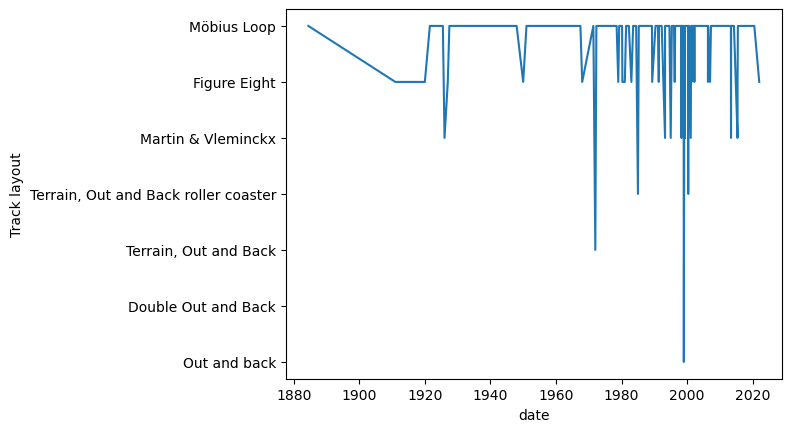

In [186]:
import seaborn as sns
coaster['Track layout'].value_counts()
sns.lineplot(data = coaster,
             x = "date",
             y = "Track layout",
             estimator = lambda x: len(x)
             )


## 4
Using the earthquake data: Which coaster was closest to an earthquake?

In [217]:
import requests
import pandas as pd
import datetime as dt
import numpy as np

# set startdate
yesterday = dt.date.today() - dt.timedelta(days = 1)

# api url
api = 'https://earthquake.usgs.gov/fdsnws/event/1/query'

# Create the payload for the GET request
payload = {
    'format': 'geojson',
    'starttime': yesterday - dt.timedelta(days = 30),
    'endtime': yesterday
}

response = requests.get(api,
                        params = payload)

if response.status_code == 200:
    quake_json = response.json()
    eq_df = pd.DataFrame([
        quake['geometry']["coordinates"] for quake in quake_json['features']
    ], columns=['lat', 'long', 'depth'])

    dist = []

    for index, row in coaster.iterrows():
        dist_lat = eq_df['lat'] + row['latitude']
        dist_long = eq_df['long'] + row['longitude']
        dist.append(np.min(np.sqrt(dist_lat **2 + dist_long**2)))

    coaster['eq_dist'] = dist

coaster.sort_values('eq_dist').head(1)

,coaster_name,Location,Status,Manufacturer,Height,Designer,Track layout,latitude,longitude,speed_mph,height_value,date,Len_ft,eq_dist
812,Formula Rossa,Ferrari World Abu Dhabi,Operating,Intamin,52 m (170.6 ft),NaN,NaN,24.4842,54.6124,149.1,170.60368,2010-11-04,NaN,2.230325
